# HIERARCHIAL CLUSTERING   

#  EAST WEST AIRLINES DATA SET 

#  Problem statement
  
  
  The telecom companies has a huge problem of churn rate of customer shifting to other companies . The objective of this project is to group similar customers into clusters that are more likely to be churn or not churn and draw insights about each cluster
  
  
  `CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

OBJECTIVE :-  minimize the churn rate

CONSTRAINTS  :-  maximize the understanding of customer behaviour
  
  
  **Success Criteria**

- **Business Success Criteria**: Achieve better understanding of the customers and minimize the churn rate

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: To increse the revenue at least 20 _30%

**Proposed Plan:**
Grouping the available customer data  will allow to understand the characteristics of each group.



# DATA COLLECTION
 
 DATA :  The data of the Telco_customer_churn.xlsx dataset has been available publicly
 
 DATA DICTIONARY :
 
 Their are 30 features and 7043 observations in the dataset
 
 DESCRPTION :
 
      1.Customer ID
      2.Count
      3.Quarter
      4.Referred a Friend
      5.Number of Referrals
      6.Tenure in Months
      7.Offer
      8.Phone Service
      9.Average Monthly Long Distance Charges
      10.Multiple Lines
      11.Internet Service
      12.Internet type
      13.Avg Monthly GB Download
      14.Online security
      15.Online Backup
      16.Device Protection Plan
      17.Premium Tech Support
      18.Streaming TV
      19.Streaming Movies
      20.Streming Music
      21.Unlimited Data
      22.Contract
      23.Paperless Billing
      24.Payment Method
      25.Monthly Charge
      26.Total Charges
      27.Total Extra Data Charges
      28.Total Long Distance Charges
      29.Total Revenue

In [1]:
### IMPORT REQUIRED PACKAGES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [3]:
telecom = pd.read_excel(r"C:\Users\amare\Downloads\Dataset_Assignment Clustering (1)\Telco_customer_churn.xlsx")

In [4]:
telecom

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [6]:
telecom.shape

(7043, 30)

In [7]:
telecom_cat = telecom.select_dtypes(include='object')
telecom_cat


,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,8779-QRDMV,Q3,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,7495-OOKFY,Q3,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,1658-BYGOY,Q3,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,4598-XLKNJ,Q3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,4846-WHAFZ,Q3,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,No,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal
7039,6840-RESVB,Q3,Yes,Offer C,Yes,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check
7040,2234-XADUH,Q3,Yes,None,Yes,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card
7041,4801-JZAZL,Q3,Yes,None,No,No,Yes,DSL,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


In [8]:
telecom_num = telecom.select_dtypes(include= ('int64','float64'))
telecom_num

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,1,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53
7039,1,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47
7040,1,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04
7041,1,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21


# EXPLORATORY DATA ANALYSIS

In [9]:
telecom.isnull().sum()

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [10]:
telecom_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Count                              7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Avg Monthly GB Download            7043 non-null   int64  
 5   Monthly Charge                     7043 non-null   float64
 6   Total Charges                      7043 non-null   float64
 7   Total Refunds                      7043 non-null   float64
 8   Total Extra Data Charges           7043 non-null   int64  
 9   Total Long Distance Charges        7043 non-null   float64
 10  Total Revenue                      7043 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 605.4 KB


In [11]:
### FIRST MOMEMT BUSINESS DECISION

In [12]:
print(telecom_num.mean())
print('\n')
print(telecom_num.median())
print('\n')
print(telecom_num.mode)

Count                                   1.000000
Number of Referrals                     1.951867
Tenure in Months                       32.386767
Avg Monthly Long Distance Charges      22.958954
Avg Monthly GB Download                20.515405
Monthly Charge                         64.761692
Total Charges                        2280.381264
Total Refunds                           1.962182
Total Extra Data Charges                6.860713
Total Long Distance Charges           749.099262
Total Revenue                        3034.379056
dtype: float64


Count                                   1.00
Number of Referrals                     0.00
Tenure in Months                       29.00
Avg Monthly Long Distance Charges      22.89
Avg Monthly GB Download                17.00
Monthly Charge                         70.35
Total Charges                        1394.55
Total Refunds                           0.00
Total Extra Data Charges                0.00
Total Long Distance Charges           4

In [13]:
### SECOND MOMENT BUSINESS DECISION

In [14]:
print(telecom_num.var())
print('\n')
print(telecom_num.std())

Count                                0.000000e+00
Number of Referrals                  9.007197e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              4.169331e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          7.168332e+05
Total Revenue                        8.209397e+06
dtype: float64


Count                                   0.000000
Number of Referrals                     3.001199
Tenure in Months                       24.542061
Avg Monthly Long Distance Charges      15.448113
Avg Monthly GB Download                20.418940
Monthly Charge                         30.090047
Total Charges                        2266.220462
Total Refunds                           7.902614
Total Extra Data Charges               25

In [15]:
### THIRD MOMENT BUSINESS DECISION

In [16]:
telecom_num.skew()

Count                                0.000000
Number of Referrals                  1.446060
Tenure in Months                     0.240543
Avg Monthly Long Distance Charges    0.049176
Avg Monthly GB Download              1.216584
Monthly Charge                      -0.220524
Total Charges                        0.963791
Total Refunds                        4.328517
Total Extra Data Charges             4.091209
Total Long Distance Charges          1.238282
Total Revenue                        0.919410
dtype: float64

In [17]:
### FOURTH MOMENT BUSINESS DECISION

In [18]:
telecom_num.kurt()

Count                                 0.000000
Number of Referrals                   0.721964
Tenure in Months                     -1.387052
Avg Monthly Long Distance Charges    -1.254654
Avg Monthly GB Download               0.881502
Monthly Charge                       -1.257260
Total Charges                        -0.227693
Total Refunds                        18.350658
Total Extra Data Charges             16.458874
Total Long Distance Charges           0.644092
Total Revenue                        -0.203457
dtype: float64

In [19]:
telecom_num.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [20]:
import dtale
d = dtale.show(telecom)
d.open_browser()

# DATA PREPROCESSING 

In [21]:
telecom.dtypes ### FINDING THE RIGHT DATA TYPES

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [22]:
duplicate = telecom.duplicated() ##  CHECKING FOR DUPLICATED VALUES
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


0

In [23]:
telecom.isnull().sum() ### FINDING NULL VALUES

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [24]:
### CHECKING FOR ZERO VARIANCE FEATURES
telecom.var()

C:\Users\amare\AppData\Local\Temp\ipykernel_19644\296515240.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Count                                0.000000e+00
Number of Referrals                  9.007197e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              4.169331e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          7.168332e+05
Total Revenue                        8.209397e+06
dtype: float64

In [25]:
telecom.var() == 0

C:\Users\amare\AppData\Local\Temp\ipykernel_19644\1518873904.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Count                                 True
Number of Referrals                  False
Tenure in Months                     False
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                       False
Total Charges                        False
Total Refunds                        False
Total Extra Data Charges             False
Total Long Distance Charges          False
Total Revenue                        False
dtype: bool

In [26]:
telecom_num.drop( ["Count"] ,axis = 1 , inplace = True)
telecom_num

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53
7039,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47
7040,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04
7041,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21


In [27]:
telecom_cat.drop( ["Customer ID" ,"Quarter"] ,axis = 1 , inplace = True)
telecom_cat

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal
7039,Yes,Offer C,Yes,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check
7040,Yes,None,Yes,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card
7041,Yes,None,No,No,Yes,DSL,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


In [28]:
### OUTLIERS TREATMENT

Number of Referrals                     AxesSubplot(0.125,0.11;0.065678x0.77)
Tenure in Months                     AxesSubplot(0.203814,0.11;0.065678x0.77)
Avg Monthly Long Distance Charges    AxesSubplot(0.282627,0.11;0.065678x0.77)
Avg Monthly GB Download              AxesSubplot(0.361441,0.11;0.065678x0.77)
Monthly Charge                       AxesSubplot(0.440254,0.11;0.065678x0.77)
Total Charges                        AxesSubplot(0.519068,0.11;0.065678x0.77)
Total Refunds                        AxesSubplot(0.597881,0.11;0.065678x0.77)
Total Extra Data Charges             AxesSubplot(0.676695,0.11;0.065678x0.77)
Total Long Distance Charges          AxesSubplot(0.755508,0.11;0.065678x0.77)
Total Revenue                        AxesSubplot(0.834322,0.11;0.065678x0.77)
dtype: object

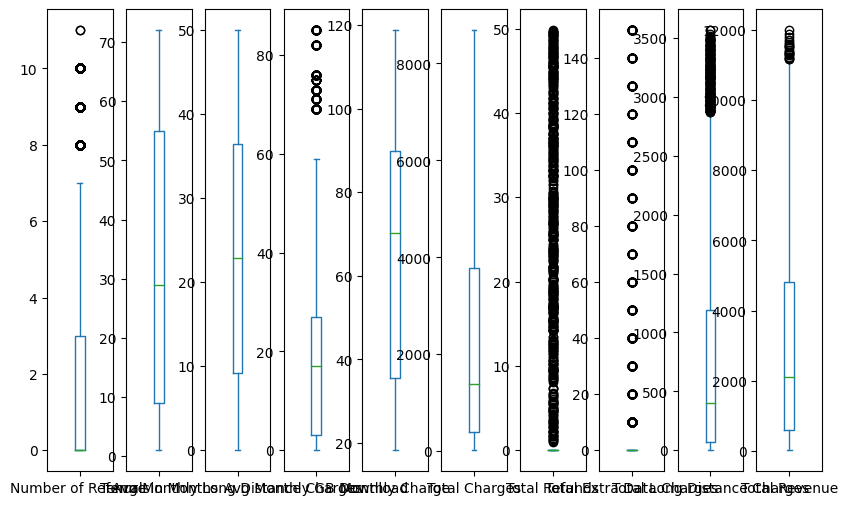

In [29]:
telecom_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

In [30]:
#### FOR THE INTERPRETING THE RIGHT CHURN OUTLIER MIGHT BE IMPORTANT FOR PROPER RESULTS 

In [31]:
### DUMMY VARIABLES # LABEL ENCODING
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
x = pd. DataFrame (enc.fit_transform(telecom_cat.iloc[: , 0:]).toarray())
x


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7039,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
### GRAPHICAL  REPRESENTATION

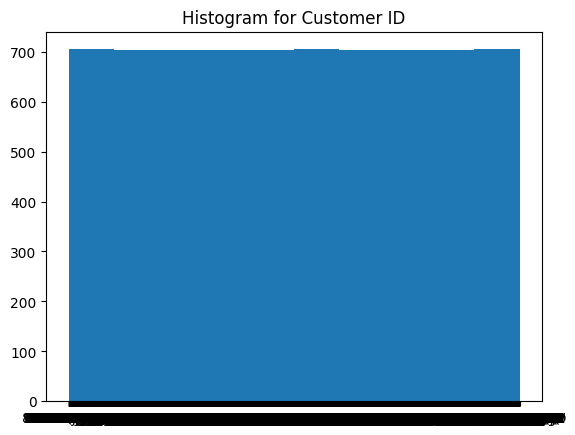

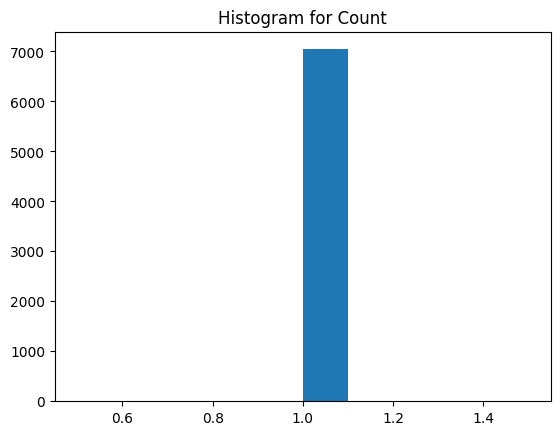

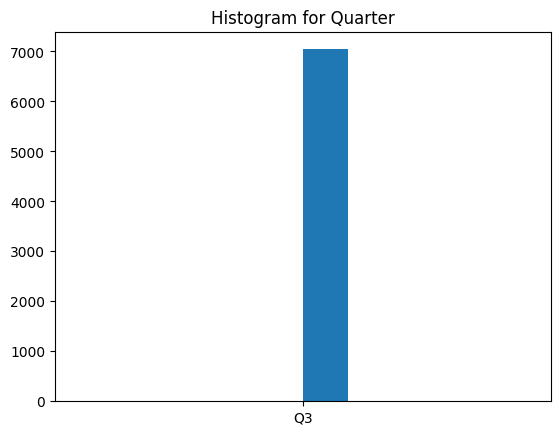

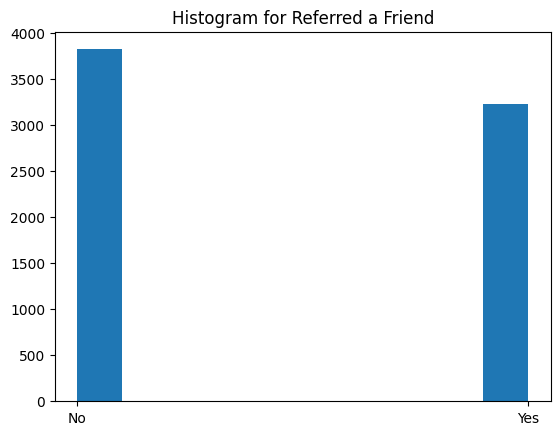

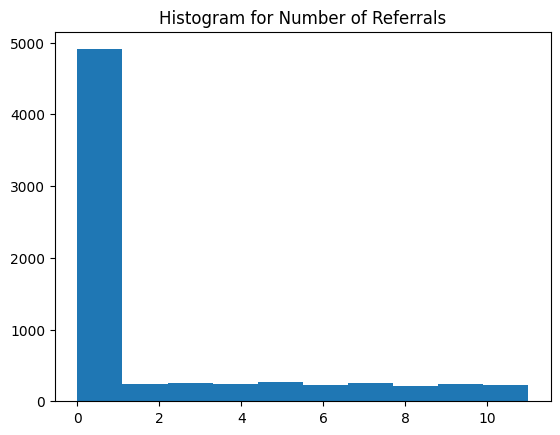

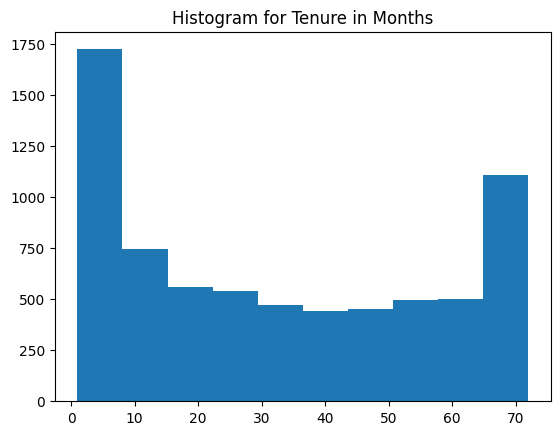

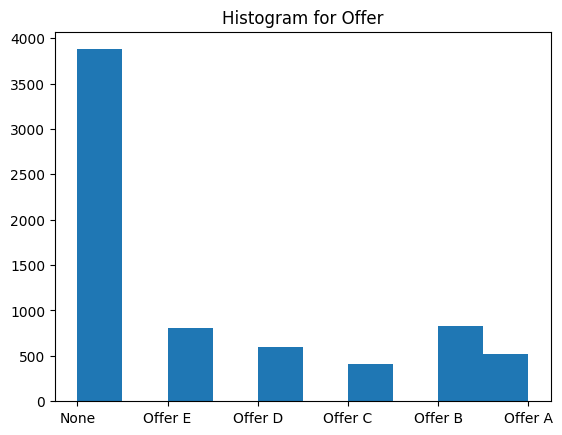

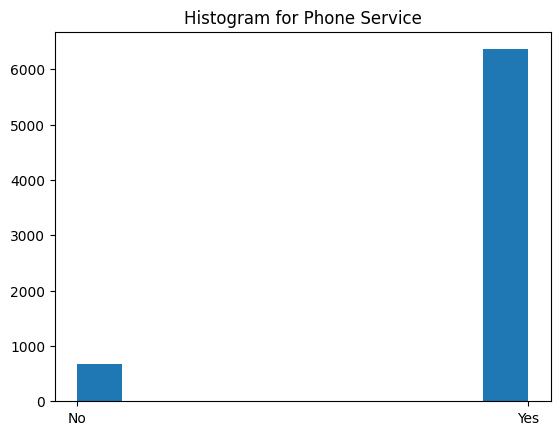

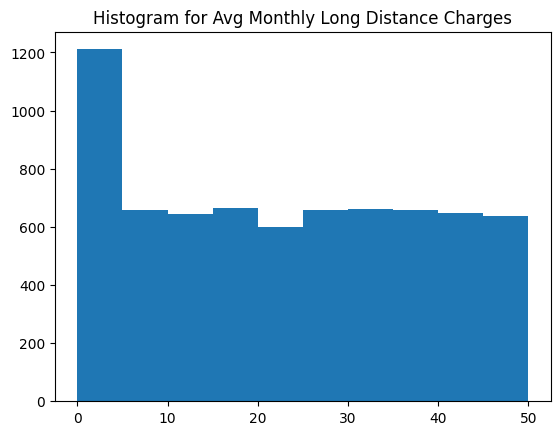

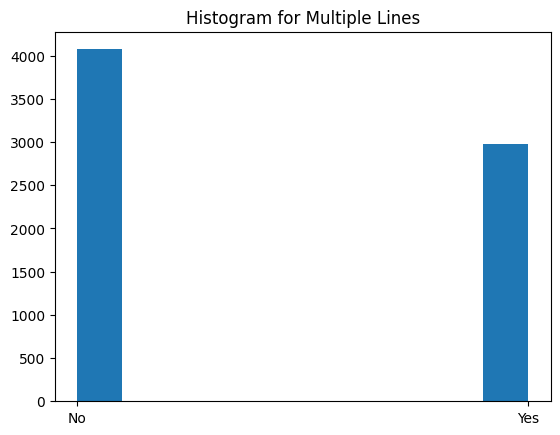

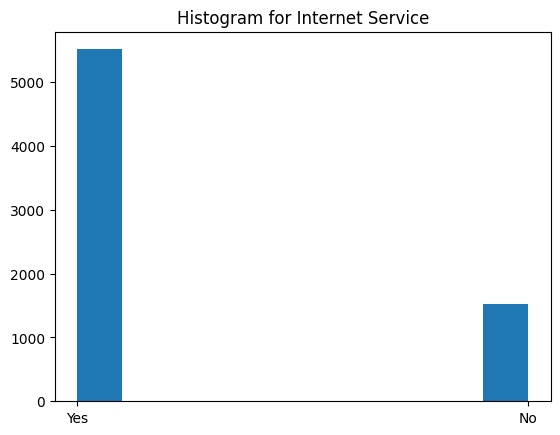

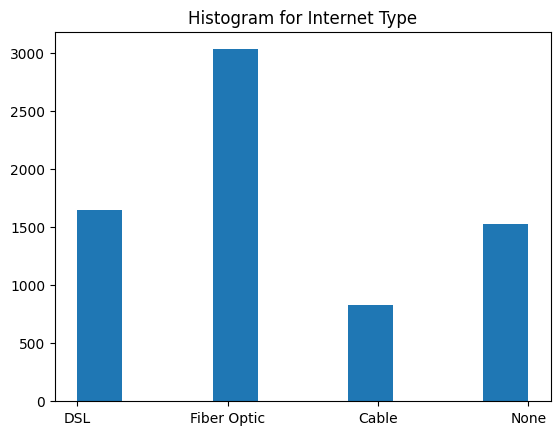

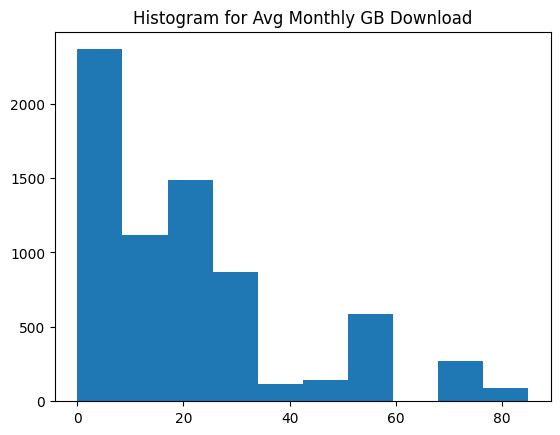

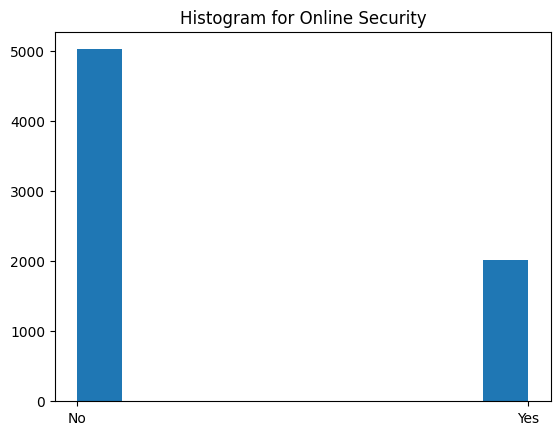

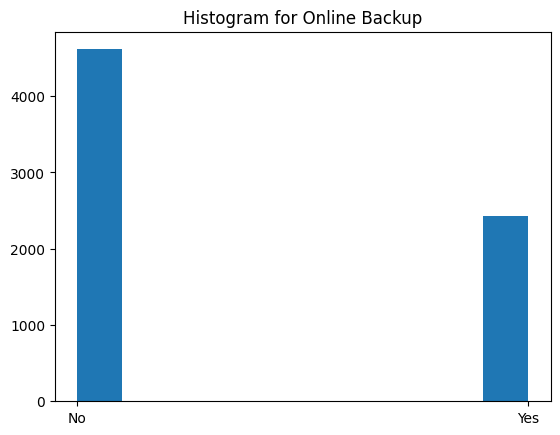

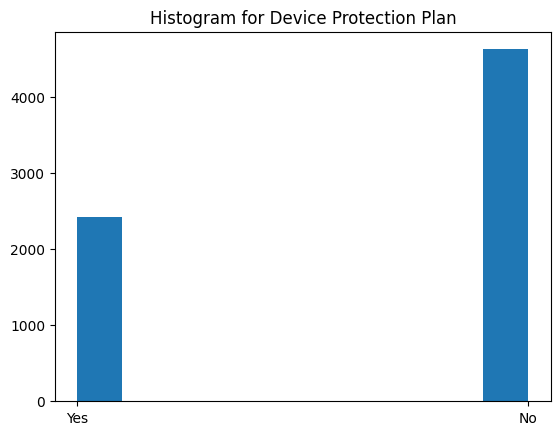

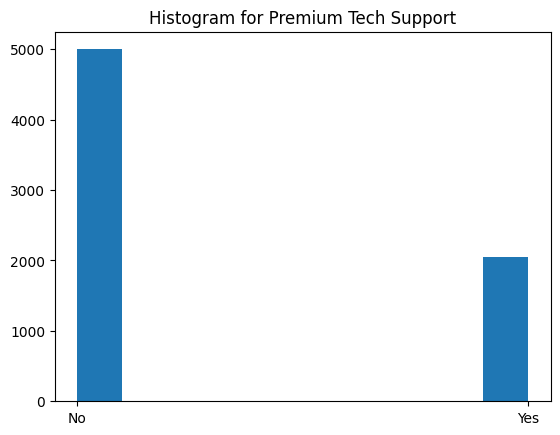

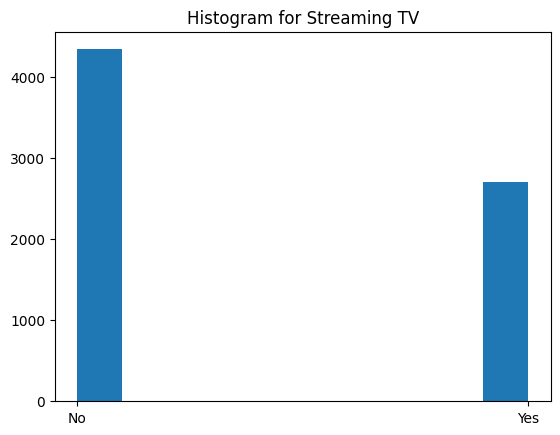

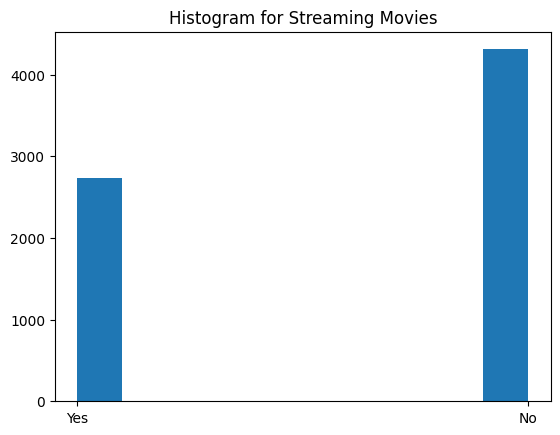

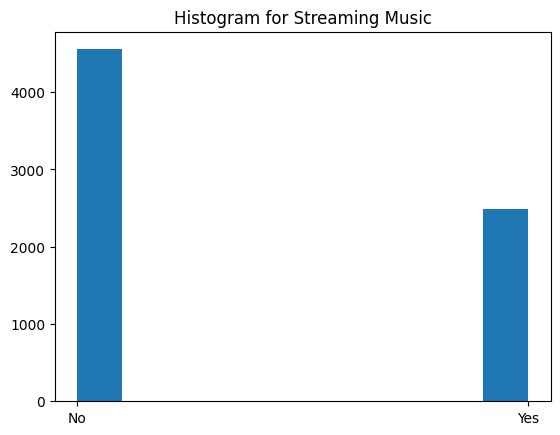

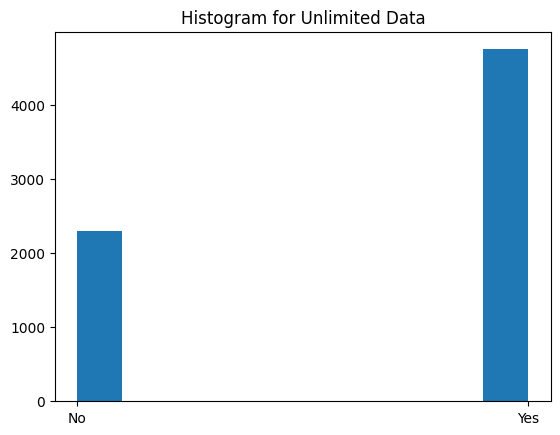

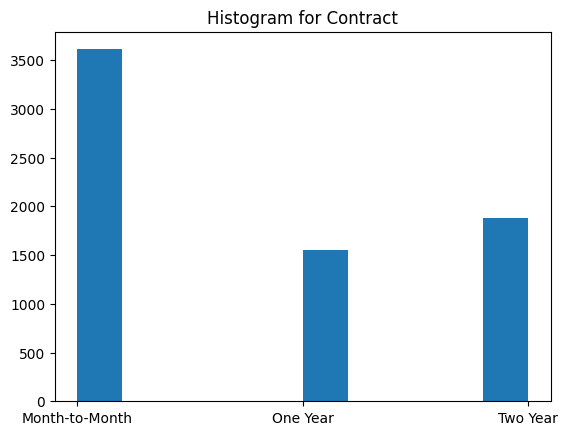

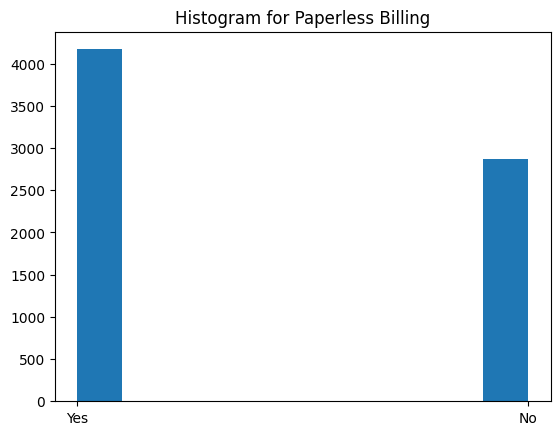

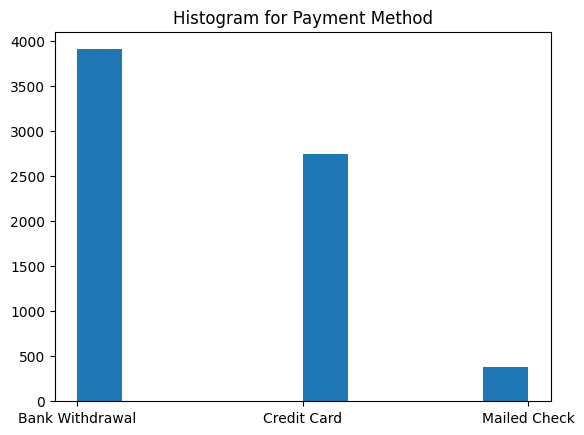

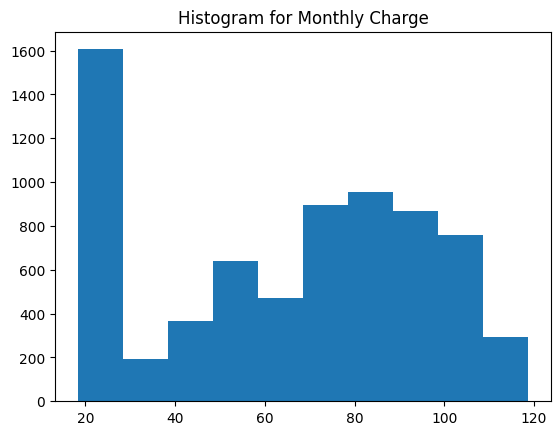

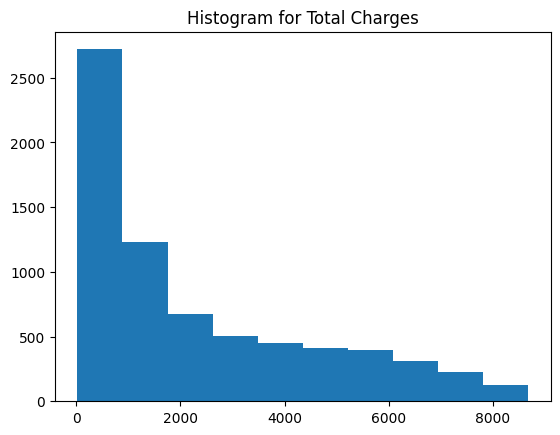

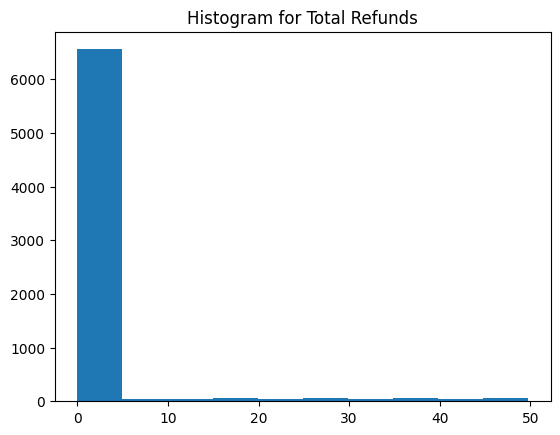

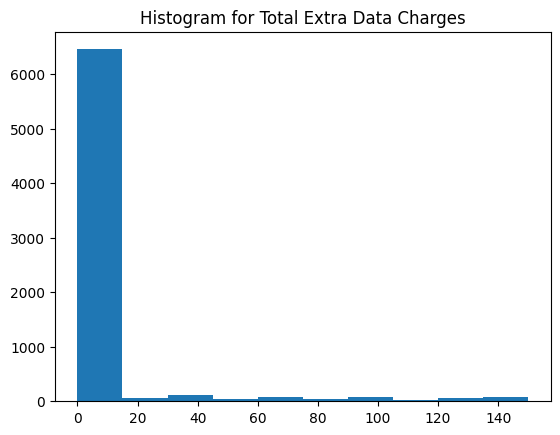

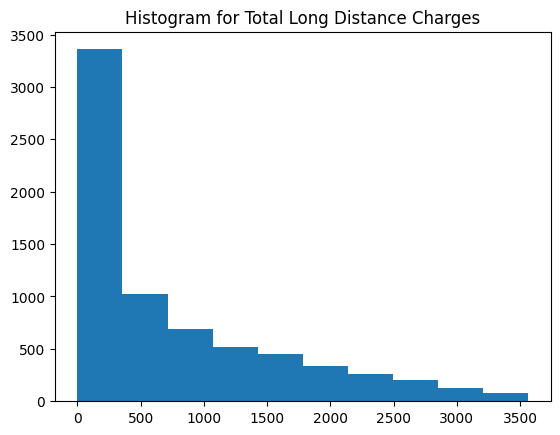

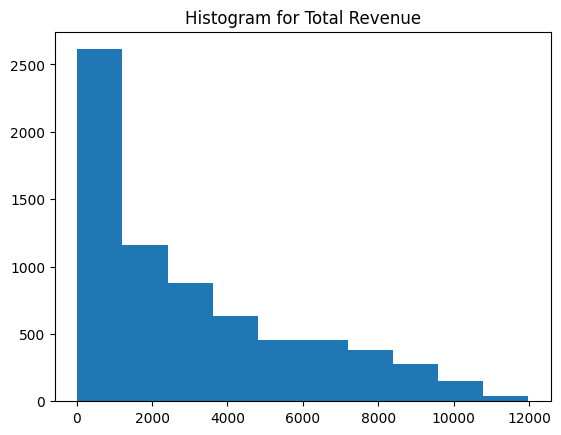

In [33]:
for i in telecom.columns:
  plt.hist(x = telecom[i])
  plt.title("Histogram for " + str(i))
  plt.show()

In [34]:
telecom_new = pd.concat([x , telecom_num], axis = 1)
telecom_new

,0,1,2,3,4,5,6,7,8,9,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53
7039,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47
7040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04
7041,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21


In [35]:
### NORMALIZATION


In [36]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [37]:
telecom_norm = norm_func(telecom_new.iloc[: , 0:])

In [38]:
telecom_norm

,0,1,2,3,4,5,6,7,8,9,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.094118,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.090909,0.098592,0.977195,0.200000,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.000000,0.239437,0.226645,0.611765,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.090909,0.338028,0.395279,0.141176,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.090909,0.507042,0.126625,0.164706,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,1.000000,0.455491,0.000000,0.028856,0.161620,0.387829,0.000000,0.459907,0.252398
7039,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.090909,0.323944,0.721144,0.282353,0.662189,0.227521,0.968668,0.000000,0.242712,0.232992
7040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.363636,1.000000,0.593319,0.694118,0.845274,0.847461,0.911428,0.000000,0.599071,0.788735
7041,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.090909,0.140845,0.000000,0.200000,0.112935,0.037809,0.547098,0.000000,0.000000,0.024908


# CLUSTER MODEL BUILDING

# HIERARCHIAL CLUSTERING


In [39]:
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

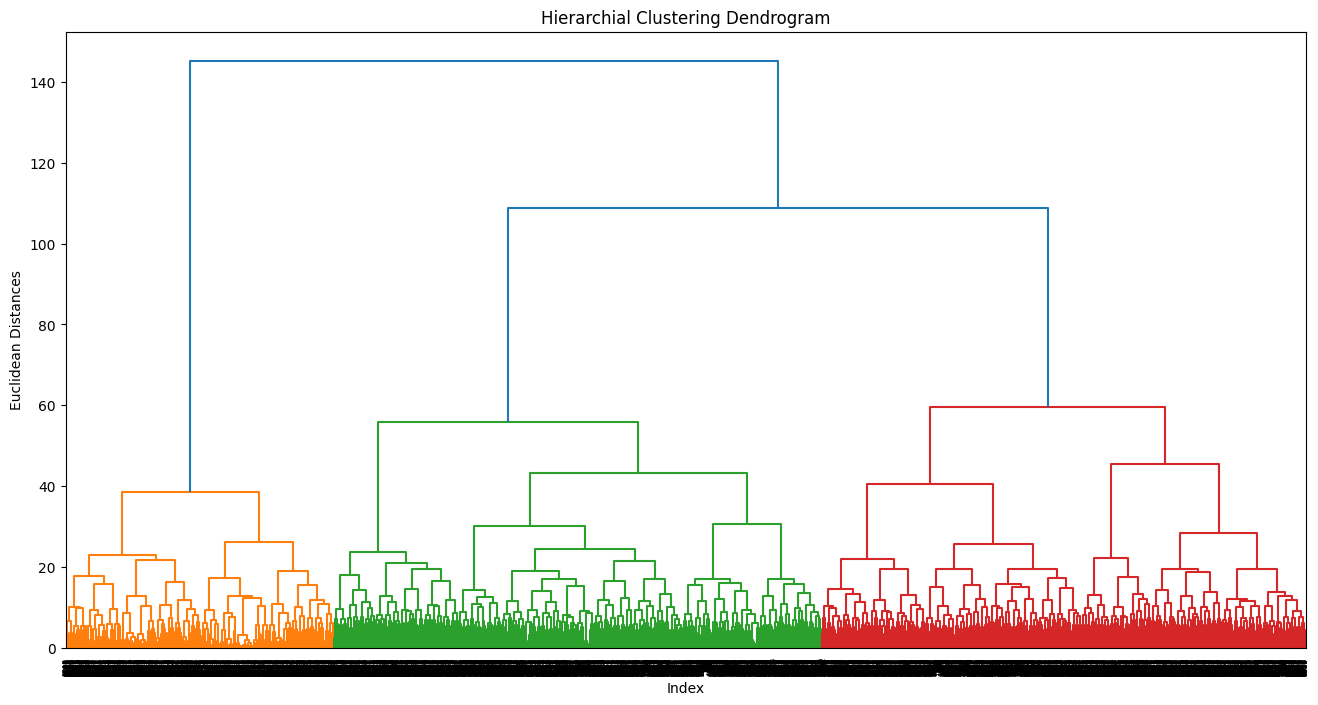

In [40]:
plt.figure(1 , figsize =(16,8))
tree_plot = dendrogram(linkage(telecom_norm, method = "ward"))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')
plt.show()

In [41]:
### APPLYING AGGLOMERATIVE CLUSTERING CHOSING 3 CLUSTERS

In [42]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

crime_hc_average = hc1.fit_predict(telecom_norm)
crime_hc_average

C:\Users\amare\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [43]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

crime_hc_complete = hc2.fit_predict(telecom_norm)
crime_hc_complete

C:\Users\amare\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



array([1, 2, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

crime_hc_single= hc3.fit_predict(telecom_norm)
crime_hc_single

C:\Users\amare\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
hc2.labels_

array([1, 2, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
cluster_labels = pd.Series(hc2.labels_)

In [47]:
telecom['cluster'] = cluster_labels

In [48]:
telecom.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,cluster
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,2
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,0
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2


In [49]:
telecom2 = telecom.sort_values(by = 'cluster' , ascending = True)
telecom2

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,cluster
7042,3186-AJIEK,1,Q3,No,0,66,None,Yes,30.96,No,...,Two Year,Yes,Bank Withdrawal,105.65,6844.50,0.0,0,2043.36,8887.86,0
5918,2495-KZNFB,1,Q3,No,0,33,None,Yes,16.76,Yes,...,Month-to-Month,Yes,Bank Withdrawal,90.65,2989.60,0.0,0,553.08,3542.68,0
5917,8486-AYEQH,1,Q3,No,0,31,None,Yes,38.78,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.05,2227.80,0.0,0,1202.18,3429.98,0
5916,4393-GEADV,1,Q3,Yes,10,70,None,Yes,39.06,Yes,...,Two Year,No,Credit Card,114.75,7842.30,0.0,0,2734.20,10576.50,0
5915,3338-CVVEH,1,Q3,No,0,12,Offer D,Yes,13.88,Yes,...,Month-to-Month,No,Bank Withdrawal,94.55,1173.55,0.0,0,166.56,1340.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,4906-ZHGPK,1,Q3,Yes,3,54,None,Yes,48.45,Yes,...,One Year,Yes,Bank Withdrawal,70.70,3770.00,0.0,0,2616.30,6386.30,2
6351,3842-QTGDL,1,Q3,Yes,8,16,None,Yes,46.00,No,...,Month-to-Month,No,Bank Withdrawal,80.75,1321.30,0.0,0,736.00,2057.30,2
2232,9572-MTILT,1,Q3,Yes,7,59,None,Yes,49.31,Yes,...,Month-to-Month,Yes,Bank Withdrawal,106.75,6252.90,0.0,40,2909.29,9202.19,2
679,2931-VUVJN,1,Q3,No,0,59,None,Yes,19.14,Yes,...,One Year,Yes,Bank Withdrawal,94.05,5483.90,0.0,30,1129.26,6643.16,2


In [52]:
from sklearn import metrics
metrics.silhouette_score(telecom_num , cluster_labels)

0.13823303356302113

In [53]:
# cluster 1 = these are the loyal customers 
# cluster 2 = these are the customers who are more tend to churn
# cluster 3 = these are the customers who are in the middle